# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jianshui
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | vilhena
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | mitsamiouli
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | luganville
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | vangaindrano
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | saint-pierre
Processing Record 16 of Set 1 | kristiansund
Processing Record 17 of Set 1 | pesaro
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | encheng
Pro

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jianshui,23.6363,102.8264,283.85,87,19,1.63,CN,1707667786
1,sisimiut,66.9395,-53.6735,254.89,89,100,1.20,GL,1707667786
2,vilhena,-12.7406,-60.1458,295.26,98,100,1.76,BR,1707667786
3,puerto ayora,-0.7393,-90.3518,303.13,92,49,4.02,EC,1707667786
4,dudinka,69.4058,86.1778,239.08,97,53,0.89,RU,1707667786


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jianshui,23.6363,102.8264,283.85,87,19,1.63,CN,1707667786
1,sisimiut,66.9395,-53.6735,254.89,89,100,1.20,GL,1707667786
2,vilhena,-12.7406,-60.1458,295.26,98,100,1.76,BR,1707667786
3,puerto ayora,-0.7393,-90.3518,303.13,92,49,4.02,EC,1707667786
4,dudinka,69.4058,86.1778,239.08,97,53,0.89,RU,1707667786


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

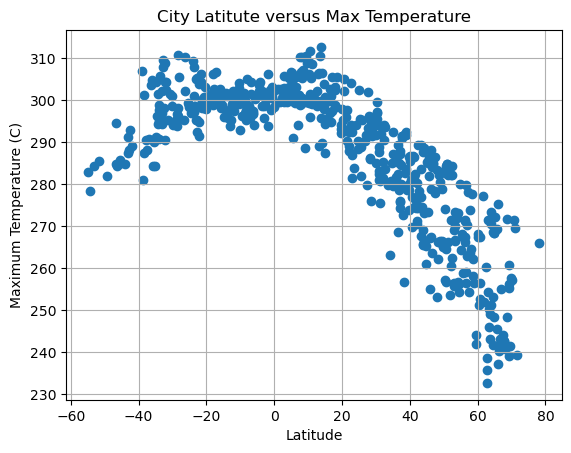

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.title('City Latitute versus Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')
plt.grid(True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Latitude_VS_MaxTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

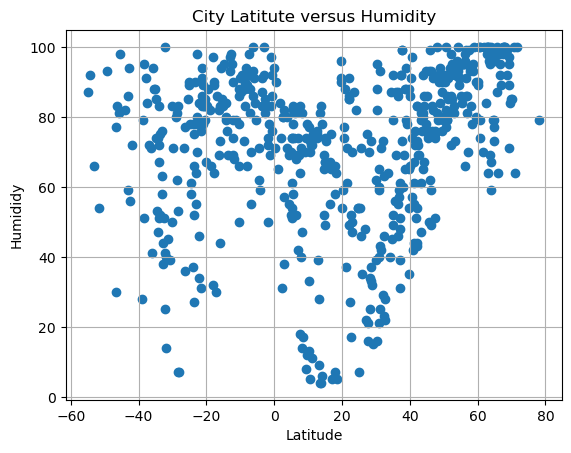

In [48]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title('City Latitute versus Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humididy')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

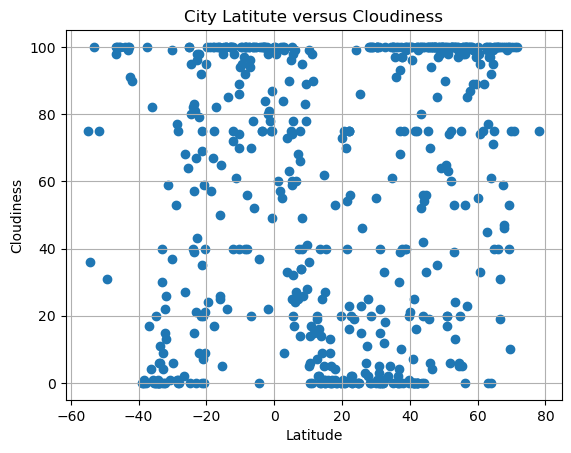

In [49]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.title('City Latitute versus Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

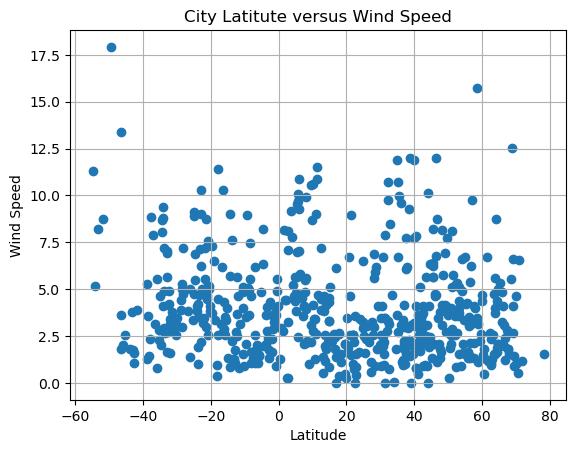

In [50]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.title('City Latitute versus Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [127]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np

def create_linear_regression_plot(data, x, y):
     # Scatter plot with customized markers and colors
    plt.scatter(data[x], data[y], color='skyblue', marker='o', s=30, edgecolor='black', linewidth=1, alpha=0.7, label='Data Points')

    # Fit a linear regression line
    coeffs = np.polyfit(data[x], data[y], 1)
    line = np.poly1d(coeffs)

    # Plot the regression line with a different color and line style
    plt.plot(data[x], line(data[x]), color='red', linestyle='--', linewidth=2, label='Regression Line')

    # Correlation coefficient calculation
    r_value = np.corrcoef(data[x], data[y])[0, 1]

    # Display regression equation and R value in a box with a shaded background
    equation_text = f'$y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}$\n$R = {r_value:.2f}$'
    plt.text(0.95, 0.05, equation_text, color='black', fontsize=12, bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'), ha='right', va='bottom', transform=plt.gca().transAxes)

    # Labeling axes and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Linear Regression Plot')

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.5)

    # Display legend
    plt.legend()

    # Show plot
    plt.show()

In [128]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jianshui,23.6363,102.8264,283.85,87,19,1.63,CN,1707667786
1,sisimiut,66.9395,-53.6735,254.89,89,100,1.20,GL,1707667786
4,dudinka,69.4058,86.1778,239.08,97,53,0.89,RU,1707667786
7,iqaluit,63.7506,-68.5145,249.09,69,97,3.73,CA,1707667719
9,stanley,54.8680,-1.6985,279.97,91,20,6.69,GB,1707667797


In [129]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vilhena,-12.7406,-60.1458,295.26,98,100,1.76,BR,1707667786
3,puerto ayora,-0.7393,-90.3518,303.13,92,49,4.02,EC,1707667786
5,mitsamiouli,-11.3847,43.2844,301.71,79,61,3.15,KM,1707667786
6,adamstown,-25.0660,-130.1015,298.24,89,100,8.91,PN,1707667786
8,luganville,-15.5333,167.1667,298.86,85,5,3.37,VU,1707667797


###  Temperature vs. Latitude Linear Regression Plot

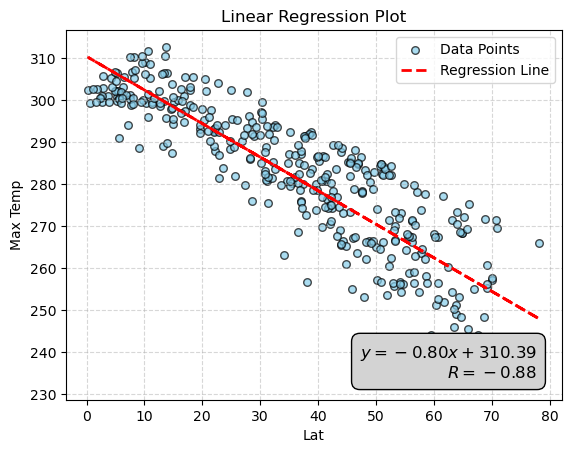

In [130]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')

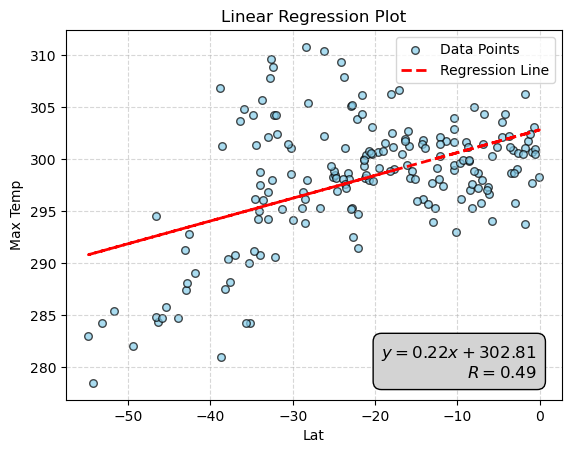

In [131]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

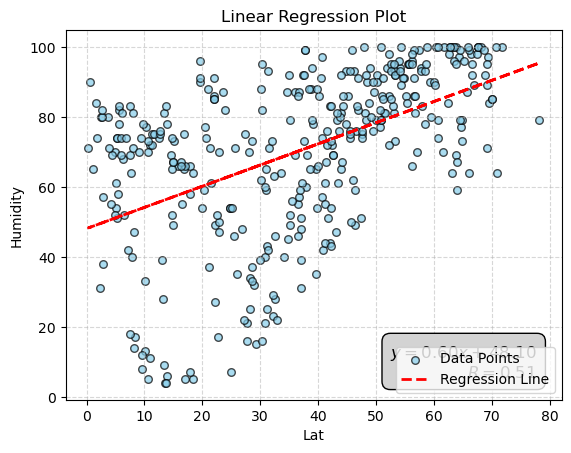

In [132]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity')

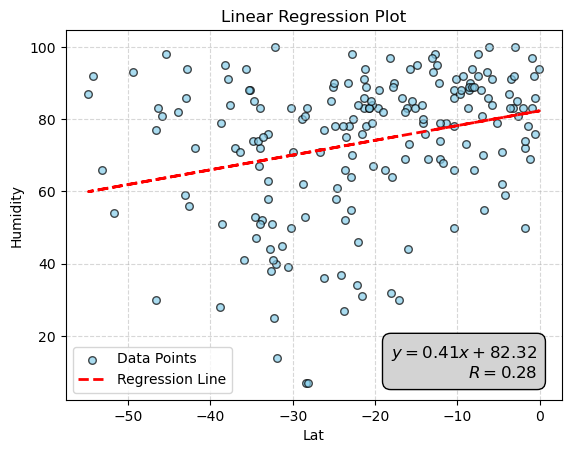

In [133]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

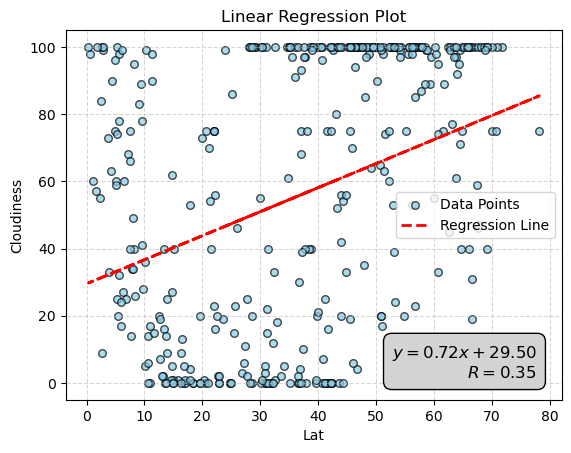

In [134]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness')

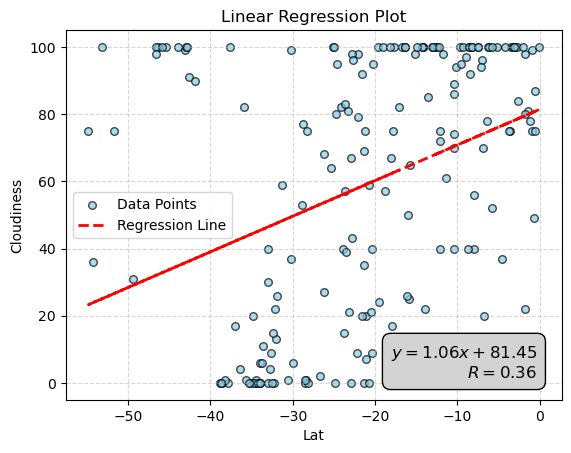

In [135]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

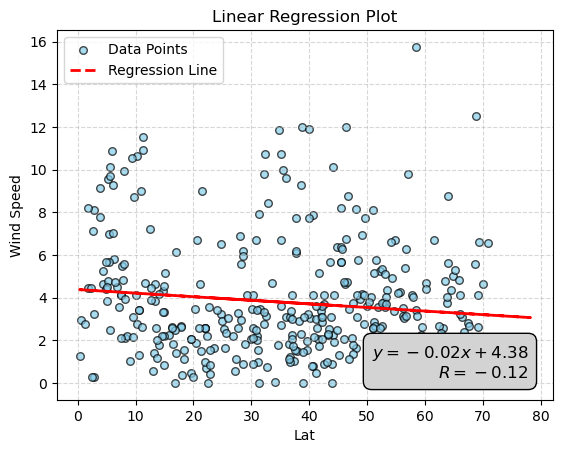

In [136]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed')

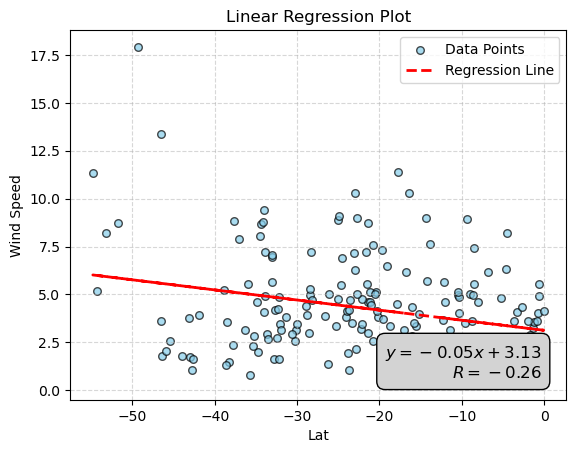

In [137]:
# Southern Hemisphere
# YOUR CODE HERE
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE